In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

max_words = 10000
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_words)

#x_train, y_train, x_test, y_test

In [3]:
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

#reverse_word_index[1], reverse_word_index[10]

In [4]:
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

#x_train, x_test

In [5]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=2), 
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid') 
])

In [6]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=6, batch_size=64, 
                    validation_data=(x_test, y_test))

#model.summary()

Epoch 1/6
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5493 - loss: 0.6845 - val_accuracy: 0.8071 - val_loss: 0.5055
Epoch 2/6
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8462 - loss: 0.4163 - val_accuracy: 0.8717 - val_loss: 0.3228
Epoch 3/6
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8958 - loss: 0.2758 - val_accuracy: 0.8789 - val_loss: 0.2898
Epoch 4/6
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9171 - loss: 0.2261 - val_accuracy: 0.8788 - val_loss: 0.2850
Epoch 5/6
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9272 - loss: 0.2026 - val_accuracy: 0.8812 - val_loss: 0.2824
Epoch 6/6
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9377 - loss: 0.1771 - val_accuracy: 0.8858 - val_loss: 0.2761


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точность на тестовых данных: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8849 - loss: 0.2765
Точность на тестовых данных: 0.8858


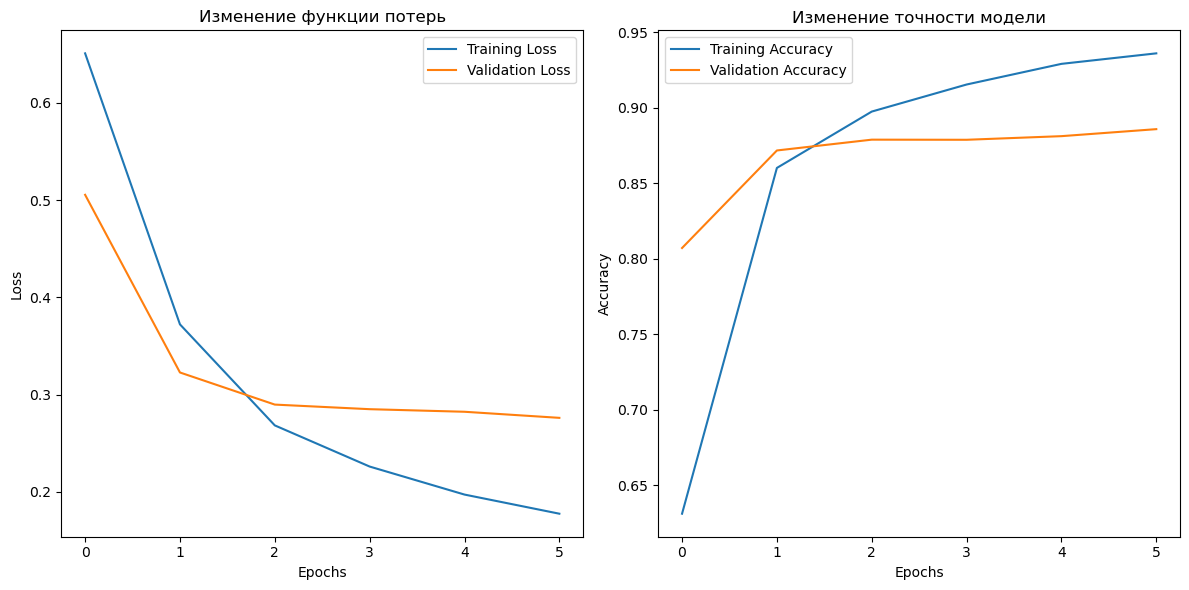

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Изменение функции потерь')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Изменение точности модели')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()